In [1]:
import matplotlib.pyplot as plt # for plotting maps
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
from statistics import mean, median
from functools import reduce
import sys
import os
import glob

# VEST TX 2020

## VEST's Documentation

Election results and precinct shapefile from the Texas Legislative Council (https://data.capitol.texas.gov/). The precinct data files available for download at the TXLC Capitol Data Portal are allocated to Census VTD geography based on Voting Age Population from the 2010 Census. The unallocated precinct results and registration statistics were generously provided by TXLC staff to instead merge with the precinct boundaries.

The shapefile includes unallocated Voter Registration (VR) and Spanish Surname Voter Registration (SSVR) for the November 2020 general election. Any VR data analysis of these unallocated precinct results should utilize this unallocated VR data rather than the VR data allocated by VTD available for download at CDP. SSVR is denoted as a percentile of total VR for each precinct.

Precinct results for the following counties were replaced in whole or in part with county source files or with precinct data provided via the Secretary of State: Andrews, Bee, Borden, Brazos, Chambers, Coryell, Dawson, Deaf Smith, Donley, Fayette, Hansford, Harrison, Hood, Hudspeth, Knox, Lamar, Loving, Mason, Maverick, Reeves, Starr, Tom Green, Trinity, Waller, Wilbarger, Willacy, Williamson.

Precinct 4/6 in Gonzales was merged prior to 2008. Precinct 5/6 in Hood was merged prior to 2012. Gonzales 4 was the city of Nixon while Gonzales 6 was the surrounding county precinct. Hood 5 and 6 were divided by US Hwy 377. However, they reappear as separate line items in the 2020 general election county reports. Since these are otherwise regarded as unitary precincts and it is unclear that the separate 2020 line items correspond to the obsolete boundaries the results for Gonzales 4/6 and Hood 5/6 were combined for this shapefile.

Brazos 84 and 85 were single parcel precincts created where new construction required a distinct ballot style. Each precinct cast 2 Republican votes for all statewide races. For this shapefile the votes for Brazos 84 and 85 were added to Brazos 82 and Brazos 2 respectively based on voter registration address.

Precinct totals for the counties listed below do not add up to the Secretary of State County Canvass for one or more offices. Most commonly this is due to omission of some ballots counted after election day from either the county precinct reports or from summary results certified to the state. In some cases these involve data entry errors where numbers were transposed, dropped, or added in one or more precincts or in countywide summations. In some cases corrections to the initial precinct results were made after the certification deadline.

Anderson, Armstrong, Cass, Cochran, Cottle, Fayette, Frio, Gillespie, Hamilton, Hansford, Hood, Howard, Hudspeth, Irion, Jasper, Kent, Kleberg, Lamar, Liberty, Live Oak, Lynn, Maverick, Morris, Motley, Presidio, Reeves, Rockwall, Shackelford, Starr, Terrell, Travis, Upton, Val Verde, Van Zandt, Ward, Webb, Willacy.

Most of the discrepancies are in single digits or low double digits. The exceptions are a 140 vote overreport from Cass for David Collins (G) for U.S. Senate, a 54 vote underreport from Van Zandt for Jane Bland (R) for Supreme Court Justice 6, a 100 vote underreport from Cochran for Staci Williams (D) for Supreme Court Justice 7, a 100 vote underreport from Travis for Jeff Boyd (R) for Supreme Court Justice 7, a 274 vote overreport from Reeves for Elizabeth Frizell for Criminal Appeals Judge 3, a 286 vote underreport from Reeves for Kevin Yeary (R) for Criminal Appeals Judge 4.

Hood had an underreport of 171-176 Republican votes and 45-54 Democratic votes for all statewide races. Kleberg had an underreport of 56-71 Republican votes and 55-67 Democratic votes for all statewide races. Presidio had an underreport of 58 votes for Chrysta Castañeda (D) for railroad commissioner, 55 votes for Amy Meachum (D) for Supreme Court Chief Justice, and 55 votes for Kathy Cheng (D) for Supreme Court Justice 6.

Votes reported countywide were distributed by candidate to precincts based on the precinct-level reported vote. This includes all early ballots in Collingsworth and Hudspeth. Early ballots for precincts 101/102, 301/303 in Donley. Mail ballots in Borden and Kimble. Federal and/or limited ballots in Bee, Bexar, Brazos, Chambers, Coryell, Harrison, Hays, and Jefferson. Provisional and military ballots in Bowie, Reeves, and Trinity.

The Mason County courthouse burned down in February 2021. The only known surviving precinct results are on a spreadsheet with an incorrect formula in place of the election day results. This was filed with the Secretary of State in 2020 and the TXLC consequently allocated all votes countywide. For this shapefile the election day votes were instead calculated as the difference between the early votes and the countywide summary totals and then distributed by candidate to precincts based on the precinct-level early vote.

In Williamson County a vendor programming error combined in person early votes to a handful of precincts for the initial results. The in person early votes were subsequently hand counted so as to be assigned to their correct precincts. A batch of about 250 ballots was not recounted before the certification deadline and thus reported only in countywide summary results. For this shapefile those in person early votes were distributed by candidate to precincts based on the precinct-level reported vote.

San Saba did not file a precinct report with the Secretary of State as required by the Texas election code and asserted they are unable to locate any precinct results for the 2020 general election. The countywide summary totals were distributed by candidate to precincts based on the 2018 precinct-level reported vote. 

The following counties reported combined results for some precincts. As these specific precincts align with VTD boundaries the combined results were replaced with the VTD allocated precinct results from the TXLC Capitol Data Portal. Any data corrections or distributions noted above were transferred accordingly.

Austin: 207/208 \
Brooks: 3/3S \
Kent: 201/202 \
Kleberg: 33/34 \
Lamar: 1A3B/1D/1E7C, 1B/1I, 1F/1G, 2B2A/2C3A, 4C/4E \
Lamb: 7/8 \
Lynn: 1/5, 2/8, 3/10, 4/11 \
McMullen: 2A/2B, 4A/4B \
Newton: 11/13/21 \
Real: 4/7 \
Red River: 1/11, 17/18, 27/30

* G20VR - Voter registration
* G20SSVR - Spanish surname voter registration


* G20PRERTRU - Donald J. Trump (Republican Party)
* G20PREDBID - Joseph R. Biden (Democratic Party)
* G20PRELJOR - Jo Jorgensen (Libertarian Party)
* G20PREGHAW - Howie Hawkins (Green Party)
* G20PREOWRI - Write-in Votes


* G20USSRCOR - John Cornyn (Republican Party)
* G20USSDHEG - Mary "MJ" Hegar (Democratic Party)
* G20USSLMCK - Kerry Douglas McKennon (Libertarian Party)
* G20USSGCOL - David B. Collins (Green Party)


* G20RRCRWRI - James "Jim" Wright (Republican Party)
* G20RRCDCAS - Chrysta Castañeda (Democratic Party)
* G20RRCLSTE - Matt Sterett (Libertarian Party)
* G20RRCGGRU - Katija "Kat" Gruene (Green Party)


* G20SSCRHEC - Nathan Hecht (Republican Party)
* G20SSCDMEA - Amy Clark Meachum (Democratic Party)
* G20SSCLASH - Mark Ash (Libertarian Party)


* G20SSCRBLA - Jane Bland (Republican Party)
* G20SSCDCHE - Kathy Cheng (Democratic Party)


* G20SSCRBOY - Jeff Boyd (Republican Party)
* G20SSCDWIL - Staci Williams (Democratic Party)
* G20SSCLSTR - William Bryan Strange III (Libertarian Party)


* G20SSCRBUS - Brett Busby (Republican Party)
* G20SSCDTRI - Gisela D. Triana (Democratic Party)
* G20SSCLOXF - Tom Oxford (Libertarian Party)


* G20SCCRRIC - Bert Richardson (Republican Party)
* G20SCCDFRI - Elizabeth Davis Frizell (Democratic Party)

* G20SCCRYEA - Kevin Patrick Yeary (Republican Party)
* G20SCCDCLI - Tina Clinton (Democratic Party)


* G20SCCRNEW - David Newell (Republican Party)
* G20SCCDBIR - Brandon Birmingham (Democratic Party)

# Election Results

## Load Election Results

This data file reports elections from 2018 on a map of TX's 2016 VTDs. The TX Capitol Data Portal Website has this data online already.  

Election results and turnout data are stored in separate files. 

In [2]:
all_files = glob.glob("./raw-from-source/Election_Results/*.csv") 
df = pd.concat((pd.read_csv(f, header = 0) for f in all_files), axis = 1)

In [3]:
returns_2020 = df.loc[:,~df.columns.duplicated()]

In [20]:
# Rename the columns to match VEST
returns_2020 = returns_2020.rename(columns = {'RichardsonR_20G_CCA 3':'G20SCCRRIC',
                                'Davis FrizellD_20G_CCA 3':'G20SCCDFRI',
                                'YearyR_20G_CCA 4':'G20SCCRYEA',
                                'ClintonD_20G_CCA 4':'G20SCCDCLI',
                                'NewellR_20G_CCA 9':'G20SCCRNEW', 
                                'BirminghamD_20G_CCA 9':'G20SCCDBIR',
                                'BidenD_20G_President':'G20PREDBID',
                                'TrumpR_20G_President':'G20PRERTRU',
                                'JorgensenL_20G_President':'G20PRELJOR',
                                'HawkinsG_20G_President':'G20PREGHAW',
                                'Write-InW_20G_President':'G20PREOWRI',
                                'CastanedaD_20G_RR Comm 1':'G20RRCDCAS', 
                                'WrightR_20G_RR Comm 1':'G20RRCRWRI',
                                'SterettL_20G_RR Comm 1':'G20RRCLSTE',
                                'GrueneG_20G_RR Comm 1':'G20RRCGGRU',
                                'BlandR_20G_Sup Ct 6':'G20SSCRBLA',
                                'ChengD_20G_Sup Ct 6':'G20SSCDCHE',
                                'BoydR_20G_Sup Ct 7':'G20SSCRBOY',
                                'StrangeL_20G_Sup Ct 7':'G20SSCLSTR',
                                'WilliamsD_20G_Sup Ct 7':'G20SSCDWIL',
                                'BusbyR_20G_Sup Ct 8':'G20SSCRBUS',
                                'TrianaD_20G_Sup Ct 8':'G20SSCDTRI',
                                'OxfordL_20G_Sup Ct 8':'G20SSCLOXF',
                                'HechtR_20G_Sup Ct Chief':'G20SSCRHEC', 
                                'MeachumD_20G_Sup Ct Chief':'G20SSCDMEA',
                                'AshL_20G_Sup Ct Chief':'G20SSCLASH',
                                'CornynR_20G_U.S. Sen':'G20USSRCOR',
                                'HegarD_20G_U.S. Sen':'G20USSDHEG',
                                'McKennonL_20G_U.S. Sen':'G20USSLMCK',
                                'CollinsG_20G_U.S. Sen':'G20USSGCOL'})
                     
# Reorder the columns to match VEST
returns_2020 = returns_2020[['CNTYVTD', 'VTDKEY',
       'G20PRERTRU', 'G20PREDBID', 'G20PRELJOR', 'G20PREGHAW', 'G20PREOWRI',
       'G20USSRCOR', 'G20USSDHEG', 'G20USSLMCK', 'G20USSGCOL', 'G20RRCRWRI',
       'G20RRCDCAS', 'G20RRCLSTE', 'G20RRCGGRU', 'G20SSCRHEC', 'G20SSCDMEA',
       'G20SSCLASH', 'G20SSCRBLA', 'G20SSCDCHE', 'G20SSCRBOY', 'G20SSCDWIL',
       'G20SSCLSTR', 'G20SSCRBUS', 'G20SSCDTRI', 'G20SSCLOXF', 'G20SCCRRIC',
       'G20SCCDFRI', 'G20SCCRYEA', 'G20SCCDCLI', 'G20SCCRNEW', 'G20SCCDBIR']]

In [21]:
# Set CNTYVTD as index
returns_2020.set_index('CNTYVTD', inplace=True)

# Drop VTDKEY
returns_2020 = returns_2020.drop('VTDKEY', axis = 1)

In [22]:
returns_2020.head()

,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREOWRI,G20USSRCOR,G20USSDHEG,G20USSLMCK,G20USSGCOL,G20RRCRWRI,...,G20SSCLSTR,G20SSCRBUS,G20SSCDTRI,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR
CNTYVTD,,,,,,,,,,,,,,,,,,,,,
0010001,791,357,13,1,2,787,334,24,8,788,...,29,779,319,41,795,338,811,319,805,322
0010002,1548,205,14,2,0,1521,199,23,10,1498,...,23,1504,195,32,1524,204,1528,196,1525,195
0010003,746,118,7,2,0,736,118,9,3,718,...,14,724,111,20,733,120,729,121,732,117
0010004,1031,117,8,0,0,1022,112,17,1,1023,...,14,1021,99,22,1030,110,1033,108,1030,108
0010005,203,12,0,0,0,202,9,1,0,197,...,1,199,9,1,199,11,196,11,197,12


These sums look right against official totals. 

In [23]:
returns_2020.shape

(9157, 30)

# VTD Shapefile

## Load TX Raw Shapefile

2016 General Election VTD Shapefile is used for these results

In [24]:
vtd_2020 = gp.read_file('./raw-from-source/vtds20g_2020/VTDs20G_2020.shp')

In [25]:
vtd_2020.head()

,OBJECTID,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,CNTYVTD,Shape_area,Shape_len,geometry
0,1,1,3,0001,1,1.0,10001,5.666216e+06,15288.088777,"POLYGON ((1413960.808 1073012.816, 1413971.571..."
1,2,1,1,0002,1,2.0,10002,2.562129e+08,94434.420881,"POLYGON ((1420165.429 1066385.798, 1420251.968..."
2,3,1,2,0003,1,3.0,10003,7.072228e+07,55660.372406,"POLYGON ((1416579.790 1072023.104, 1416744.635..."
3,4,1,6,0004,1,4.0,10004,2.410662e+08,91319.549282,"POLYGON ((1435674.876 1074608.545, 1435714.039..."
4,5,1,5,0005,1,5.0,10005,1.689854e+08,86937.648556,"POLYGON ((1436888.342 1072498.734, 1436911.364..."


In [26]:
vtd_2020.shape

(9157, 10)

In [27]:
vtd_2020.crs

<Projected CRS: PROJCS["NAD_1983_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: NAD_1983_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

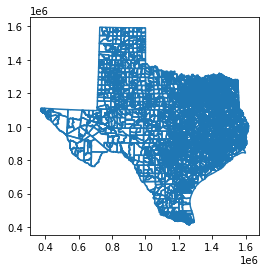

In [28]:
vtd_2020.boundary.plot()

## Load VEST Final Shapefile

In [29]:
tx_vest = gp.read_file('./raw-from-source/VEST/tx_2020/tx_2020.shp')

In [30]:
tx_vest.head()

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G20VR,G20SSVR,G20PRERTRU,G20PREDBID,G20PRELJOR,...,G20SSCRBUS,G20SSCDTRI,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR,geometry
0,113,7,1104,1131104,57,2745,39.5,221,1173,7,...,195,1157,32,216,1172,214,1169,219,1162,"POLYGON ((1314208.406 1178220.110, 1314211.847..."
1,201,2,0312,2010312,101,3973,11.3,1124,1460,21,...,1190,1290,54,1194,1343,1152,1373,1170,1345,"POLYGON ((1432565.993 851290.217, 1432575.099 ..."
2,351,4,0003,3510003,176,626,1.1,412,28,0,...,387,28,5,390,29,382,32,386,31,"POLYGON ((1602738.373 1008175.555, 1602745.401..."
3,181,4,0304,1810304,91,3058,4.5,1290,676,29,...,1331,597,39,1335,632,1339,617,1347,619,"POLYGON ((1312523.436 1279889.507, 1312544.741..."
4,201,2,0877,2010877,101,5743,27.1,1352,2554,43,...,1316,2466,105,1359,2516,1379,2495,1382,2490,"POLYGON ((1409146.792 864246.161, 1409155.944 ..."


In [31]:
tx_vest.shape

(9014, 38)

In [32]:
tx_vest.crs

<Projected CRS: PROJCS["NAD_1983_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: NAD_1983_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

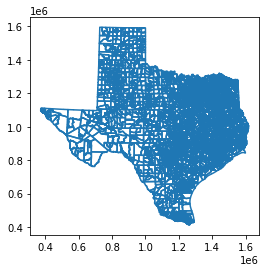

In [33]:
tx_vest.boundary.plot()

# Joining

## Join Election Results to VTD File

In [34]:
returns_2020.head(1)

,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREOWRI,G20USSRCOR,G20USSDHEG,G20USSLMCK,G20USSGCOL,G20RRCRWRI,...,G20SSCLSTR,G20SSCRBUS,G20SSCDTRI,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR
CNTYVTD,,,,,,,,,,,,,,,,,,,,,
0010001,791,357,13,1,2,787,334,24,8,788,...,29,779,319,41,795,338,811,319,805,322


In [35]:
tx_rdh = returns_2020.merge(vtd_2020, how = 'left', on = 'CNTYVTD', indicator = True)

In [36]:
tx_rdh.groupby('_merge').count()

,CNTYVTD,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREOWRI,G20USSRCOR,G20USSDHEG,G20USSLMCK,G20USSGCOL,...,G20SCCDBIR,OBJECTID,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,Shape_area,Shape_len,geometry
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,...,1942,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,7215,7215,7215,7215,7215,7215,7215,7215,7215,7215,...,7215,7215,7215,7215,7215,7215,7215,7215,7215,7215


So the TX election results and VTD files merged no problem

In [37]:
tx_rdh.head(1)

,CNTYVTD,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREOWRI,G20USSRCOR,G20USSDHEG,G20USSLMCK,G20USSGCOL,...,OBJECTID,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,Shape_area,Shape_len,geometry,_merge
0,0010001,791,357,13,1,2,787,334,24,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only


In [38]:
tx_rdh.drop(columns=['_merge'], inplace = True)

## Join RDH File to VEST File

### Join Attempt #1

In [39]:
tx_vest.head(1)

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G20VR,G20SSVR,G20PRERTRU,G20PREDBID,G20PRELJOR,...,G20SSCRBUS,G20SSCDTRI,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR,geometry
0,113,7,1104,1131104,57,2745,39.5,221,1173,7,...,195,1157,32,216,1172,214,1169,219,1162,"POLYGON ((1314208.406 1178220.110, 1314211.847..."


In [40]:
overlap = tx_rdh.merge(tx_vest, how = 'outer', left_on = 'CNTYVTD', right_on = 'PCTKEY', indicator = True)

In [41]:
overlap.groupby('_merge').count()

,CNTYVTD,G20PRERTRU_x,G20PREDBID_x,G20PRELJOR_x,G20PREGHAW_x,G20PREOWRI_x,G20USSRCOR_x,G20USSDHEG_x,G20USSLMCK_x,G20USSGCOL_x,...,G20SSCRBUS_y,G20SSCDTRI_y,G20SSCLOXF_y,G20SCCRRIC_y,G20SCCDFRI_y,G20SCCRYEA_y,G20SCCDCLI_y,G20SCCRNEW_y,G20SCCDBIR_y,geometry_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
both,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,...,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002


Look at the precincts that didn't join

In [42]:
# with pd.option_context('display.max_rows', 500):
#     print(overlap.loc[overlap['_merge'] == 'left_only'][['CNTYVTD','G16PREDCli_x']].sort_values(by='CNTYVTD'))
overlap.loc[overlap['_merge'] == 'left_only'][['CNTYVTD','G20PRERTRU_x']].sort_values(by='CNTYVTD')

,CNTYVTD,G20PRERTRU_x
0,0010001,791.0
1,0010002,1548.0
2,0010003,746.0
3,0010004,1031.0
4,0010005,203.0
...,...,...
8962,4890002B,280.0
9025,4910333A,1438.0
9026,4910333B,8.0
9095,4970007A,432.0


In [43]:
overlap.loc[overlap['_merge'] == 'right_only'][['PCTKEY','G20PRERTRU_y']].sort_values(by='PCTKEY')

,PCTKEY,G20PRERTRU_y
10070,10001,791.0
9860,10002,1548.0
10069,10003,746.0
9862,10004,1031.0
10073,10005,203.0
...,...,...
9520,990412,1307.0
9780,990413,1358.0
9521,990414,287.0
9523,990415,164.0


Interesting, so VEST cleaned up the A,B,C precincts that didn't have election results... did they merge those geographies? 

<AxesSubplot:>

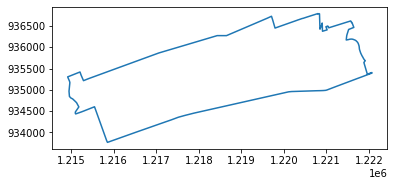

In [46]:
vtd_2020.loc[(vtd_2020['CNTYVTD'].str.contains('4910333A'))].boundary.plot()

<AxesSubplot:>

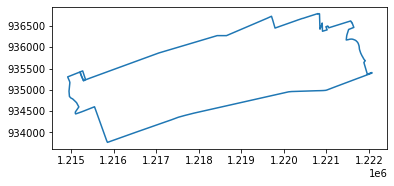

In [49]:
vtd_2020.loc[(vtd_2020['CNTYVTD'].str.contains('4910333'))].boundary.plot()

<AxesSubplot:>

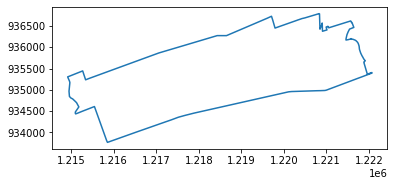

In [50]:
tx_vest.loc[tx_vest.PCTKEY == '4910333'].boundary.plot()

Based on this spot check, it does look like they merged those geographies. We will try to replicate this but we don't know why they did it

In [51]:
tx_rdh[tx_rdh.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])].head(3)

,CNTYVTD,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREOWRI,G20USSRCOR,G20USSDHEG,G20USSLMCK,G20USSGCOL,...,G20SCCDBIR,OBJECTID,CNTY,COLOR,VTD,CNTYKEY,VTDKEY,Shape_area,Shape_len,geometry
0,0010001,791,357,13,1,2,787,334,24,8,...,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,0010002,1548,205,14,2,0,1521,199,23,10,...,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,0010003,746,118,7,2,0,736,118,9,3,...,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [52]:
tx_rdh[tx_rdh.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])].shape

(2155, 40)

In [53]:
tx_rdh_v2 = tx_rdh.copy()

In [54]:
tx_rdh = tx_rdh_v2.copy()

In [55]:
tx_rdh.columns

Index(['CNTYVTD', 'G20PRERTRU', 'G20PREDBID', 'G20PRELJOR', 'G20PREGHAW',
       'G20PREOWRI', 'G20USSRCOR', 'G20USSDHEG', 'G20USSLMCK', 'G20USSGCOL',
       'G20RRCRWRI', 'G20RRCDCAS', 'G20RRCLSTE', 'G20RRCGGRU', 'G20SSCRHEC',
       'G20SSCDMEA', 'G20SSCLASH', 'G20SSCRBLA', 'G20SSCDCHE', 'G20SSCRBOY',
       'G20SSCDWIL', 'G20SSCLSTR', 'G20SSCRBUS', 'G20SSCDTRI', 'G20SSCLOXF',
       'G20SCCRRIC', 'G20SCCDFRI', 'G20SCCRYEA', 'G20SCCDCLI', 'G20SCCRNEW',
       'G20SCCDBIR', 'OBJECTID', 'CNTY', 'COLOR', 'VTD', 'CNTYKEY', 'VTDKEY',
       'Shape_area', 'Shape_len', 'geometry'],
      dtype='object')

Merge election results columns

In [57]:
returns_2020.reset_index(inplace = True)

In [58]:
returns_2020[(returns_2020.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])) & (returns_2020.CNTYVTD.str.startswith('2010143'))]

,CNTYVTD,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREOWRI,G20USSRCOR,G20USSDHEG,G20USSLMCK,G20USSGCOL,...,G20SSCLSTR,G20SSCRBUS,G20SSCDTRI,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR


In [59]:
temp_list = returns_2020[(returns_2020.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])) & (returns_2020.CNTYVTD.str.startswith('2010143'))].sum(numeric_only = True).to_list()
temp_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [60]:
returns_2020.columns

Index(['CNTYVTD', 'G20PRERTRU', 'G20PREDBID', 'G20PRELJOR', 'G20PREGHAW',
       'G20PREOWRI', 'G20USSRCOR', 'G20USSDHEG', 'G20USSLMCK', 'G20USSGCOL',
       'G20RRCRWRI', 'G20RRCDCAS', 'G20RRCLSTE', 'G20RRCGGRU', 'G20SSCRHEC',
       'G20SSCDMEA', 'G20SSCLASH', 'G20SSCRBLA', 'G20SSCDCHE', 'G20SSCRBOY',
       'G20SSCDWIL', 'G20SSCLSTR', 'G20SSCRBUS', 'G20SSCDTRI', 'G20SSCLOXF',
       'G20SCCRRIC', 'G20SCCDFRI', 'G20SCCRYEA', 'G20SCCDCLI', 'G20SCCRNEW',
       'G20SCCDBIR'],
      dtype='object')

In [63]:
temp = pd.DataFrame([temp_list], columns = ['CNTYVTD','G20PREDBID', 'G20PRELJOR', 'G20PREGHAW',
       'G20PREOWRI', 'G20USSRCOR', 'G20USSDHEG', 'G20USSLMCK', 'G20USSGCOL',
       'G20RRCRWRI', 'G20RRCDCAS', 'G20RRCLSTE', 'G20RRCGGRU', 'G20SSCRHEC',
       'G20SSCDMEA', 'G20SSCLASH', 'G20SSCRBLA', 'G20SSCDCHE', 'G20SSCRBOY',
       'G20SSCDWIL', 'G20SSCLSTR', 'G20SSCRBUS', 'G20SSCDTRI', 'G20SSCLOXF',
       'G20SCCRRIC', 'G20SCCDFRI', 'G20SCCRYEA', 'G20SCCDCLI', 'G20SCCRNEW',
       'G20SCCDBIR'])
temp

,CNTYVTD,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREOWRI,G20USSRCOR,G20USSDHEG,G20USSLMCK,G20USSGCOL,G20RRCRWRI,...,G20SSCLSTR,G20SSCRBUS,G20SSCDTRI,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The following code goes through the precincts that did not join, and merges the geographies and aggregates the election results. The code is ugly because there's no universal solution, because some precincts have A,B,C,D,E,F that need to be merged.

At the end, this code prints out the county/precinct pairs that were merged. 

In [ ]:
tx_rdh.sum()

In [41]:
count = 0 
rdh_vtd_dissolved = []
temp_df = gp.GeoDataFrame()
for index, row in tx_rdh[tx_rdh.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])].iterrows():
#     print(row['CNTYVTD'])
    unique_id = row['CNTYVTD'].replace('A','').replace('B','').replace('C','').replace('D','').replace('E','').replace('F','')
    rdh_vtd_dissolved.append((row['CNTY'], unique_id))    
    
    if count == 0: 
        group_unique_id = unique_id
    else: 
        if unique_id != group_unique_id: 
            temp_dissolved = temp_df.dissolve(by='CNTY')
            temp_dissolved.reset_index(inplace = True)
            temp_dissolved['CNTYVTD'] = temp_dissolved['CNTYVTD'].str.replace('A','')
            
            # merge election results
            temp_list = returns_2018[(returns_2018.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])) & (returns_2018.CNTYVTD.str.startswith(group_unique_id))].sum(numeric_only = True).to_list()
            temp_election_results = pd.DataFrame([temp_list], columns = ['G18USSRCRU', 'G18USSDORO', 'G18USSLDIK',
       'G18GOVRABB', 'G18GOVDVAL', 'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL',
       'G18LTGLMCK', 'G18ATGRPAX', 'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG',
       'G18COMDCHE', 'G18COMLSAN', 'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN',
       'G18AGRRMIL', 'G18AGRDOLS', 'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA',
       'G18RRCLWRI', 'G18SSCRBLA', 'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN',
       'G18SSCRBRO', 'G18SSCDCHE', 'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR',
       'G18SCCRHER', 'G18SCCDFRA', 'G18SCCRSLA', 'G18SCCLASH'])

            temp_dissolved[['G18USSRCRU', 'G18USSDORO', 'G18USSLDIK',
       'G18GOVRABB', 'G18GOVDVAL', 'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL',
       'G18LTGLMCK', 'G18ATGRPAX', 'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG',
       'G18COMDCHE', 'G18COMLSAN', 'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN',
       'G18AGRRMIL', 'G18AGRDOLS', 'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA',
       'G18RRCLWRI', 'G18SSCRBLA', 'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN',
       'G18SSCRBRO', 'G18SSCDCHE', 'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR',
       'G18SCCRHER', 'G18SCCDFRA', 'G18SCCRSLA', 'G18SCCLASH']] = temp_election_results[['G18USSRCRU', 'G18USSDORO', 'G18USSLDIK',
       'G18GOVRABB', 'G18GOVDVAL', 'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL',
       'G18LTGLMCK', 'G18ATGRPAX', 'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG',
       'G18COMDCHE', 'G18COMLSAN', 'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN',
       'G18AGRRMIL', 'G18AGRDOLS', 'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA',
       'G18RRCLWRI', 'G18SSCRBLA', 'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN',
       'G18SSCRBRO', 'G18SSCDCHE', 'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR',
       'G18SCCRHER', 'G18SCCDFRA', 'G18SCCRSLA', 'G18SCCLASH']]
            
            tx_rdh = tx_rdh.append(temp_dissolved)
            
            temp_df = gp.GeoDataFrame()
            group_unique_id = unique_id
    
    temp_df = temp_df.append(row)
    tx_rdh.drop([index],inplace = True)

    count += 1
    

In [42]:
# do the last one out of the loop
temp_dissolved = temp_df.dissolve(by='CNTY')
temp_dissolved.reset_index(inplace = True)
temp_dissolved['CNTYVTD'] = temp_dissolved['CNTYVTD'].str.replace('A','')
temp_list = returns_2018[(returns_2018.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'left_only']['CNTYVTD'])) & (returns_2018.CNTYVTD.str.contains(group_unique_id))].sum(numeric_only = True).to_list()
temp_list

[667,
 214,
 9,
 710,
 160,
 13,
 634,
 228,
 19,
 647,
 207,
 26,
 677,
 166,
 22,
 697,
 151,
 29,
 656,
 197,
 17,
 679,
 165,
 26,
 683,
 181,
 686,
 174,
 682,
 178,
 668,
 173,
 20,
 691,
 168,
 706,
 92]

In [43]:
temp_election_results = pd.DataFrame([temp_list], columns = ['G18USSRCRU', 'G18USSDORO', 'G18USSLDIK',
       'G18GOVRABB', 'G18GOVDVAL', 'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL',
       'G18LTGLMCK', 'G18ATGRPAX', 'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG',
       'G18COMDCHE', 'G18COMLSAN', 'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN',
       'G18AGRRMIL', 'G18AGRDOLS', 'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA',
       'G18RRCLWRI', 'G18SSCRBLA', 'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN',
       'G18SSCRBRO', 'G18SSCDCHE', 'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR',
       'G18SCCRHER', 'G18SCCDFRA', 'G18SCCRSLA', 'G18SCCLASH'])
temp_dissolved[['G18USSRCRU', 'G18USSDORO', 'G18USSLDIK',
       'G18GOVRABB', 'G18GOVDVAL', 'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL',
       'G18LTGLMCK', 'G18ATGRPAX', 'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG',
       'G18COMDCHE', 'G18COMLSAN', 'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN',
       'G18AGRRMIL', 'G18AGRDOLS', 'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA',
       'G18RRCLWRI', 'G18SSCRBLA', 'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN',
       'G18SSCRBRO', 'G18SSCDCHE', 'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR',
       'G18SCCRHER', 'G18SCCDFRA', 'G18SCCRSLA', 'G18SCCLASH']] = temp_election_results[['G18USSRCRU', 'G18USSDORO', 'G18USSLDIK',
       'G18GOVRABB', 'G18GOVDVAL', 'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL',
       'G18LTGLMCK', 'G18ATGRPAX', 'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG',
       'G18COMDCHE', 'G18COMLSAN', 'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN',
       'G18AGRRMIL', 'G18AGRDOLS', 'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA',
       'G18RRCLWRI', 'G18SSCRBLA', 'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN',
       'G18SSCRBRO', 'G18SSCDCHE', 'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR',
       'G18SCCRHER', 'G18SCCDFRA', 'G18SCCRSLA', 'G18SCCLASH']]
tx_rdh = tx_rdh.append(temp_dissolved)
# tx_rdh.drop([index],inplace = True)

print('Precincts in the RDH file that were dissolved: ', set(rdh_vtd_dissolved))

Precincts in the RDH file that were dissolved:  {(nan, '0294184'), (nan, '0291146'), (nan, '0410090'), (nan, '0250004'), (nan, '0850016'), (nan, '0930013'), (nan, '0294213'), (113.0, '1133940'), (nan, '0050010'), (nan, '0050010'), (nan, '0293074'), (nan, '0293077'), (nan, '0292117'), (nan, '0294172'), (nan, '0293186'), (nan, '0910407'), (nan, '0850061'), (nan, '0390064'), (nan, '397001'), (nan, '397001'), (nan, '0050035'), (nan, '0291136'), (nan, '0710002'), (nan, '4394724'), (nan, '0294188'), (nan, '037005'), (nan, '037005'), (nan, '037005'), (nan, '0610095'), (nan, '0670018'), (nan, '0292043'), (nan, '0970012'), (nan, '0293179'), (nan, '0294120'), (nan, '0410080'), (nan, '0293024'), (nan, '0291090'), (nan, '0110402'), (nan, '0690301'), (nan, '0610070'), (nan, '0610080'), (nan, '0670009'), (nan, '0910303'), (nan, '0211022'), (nan, '0990416'), (nan, '0294084'), (nan, '037001'), (nan, '037001'), (nan, '0770013'), (nan, '083002'), (nan, '0450002'), (nan, '329109'), (nan, '329109'), (nan,

Check that the example case that we were testing out above looks good

In [44]:
returns_2018[(returns_2018.CNTYVTD.str.contains('2010143'))]

,CNTYVTD,G18USSRCRU,G18USSDORO,G18USSLDIK,G18GOVRABB,G18GOVDVAL,G18GOVLTIP,G18LTGRPAT,G18LTGDCOL,G18LTGLMCK,...,G18SSCDSAN,G18SSCRBRO,G18SSCDCHE,G18SCCRKEL,G18SCCDJAC,G18SCCLSTR,G18SCCRHER,G18SCCDFRA,G18SCCRSLA,G18SCCLASH
4159,2010143,2164,1859,25,2381,1623,41,2202,1794,52,...,1768,2274,1741,2207,1757,52,2286,1722,2427,608


In [45]:
tx_rdh[(tx_rdh.CNTYVTD.str.contains('2010143'))]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

Check the election result totals are still good: 

In [46]:
tx_rdh.sum()

C:\Users\youhy\AppData\Local\Temp/ipykernel_4904/578660032.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tx_rdh.sum()


G18USSRCRU    4.270012e+06
G18USSDORO    4.046213e+06
G18USSLDIK    6.555300e+04
G18GOVRABB    4.665848e+06
G18GOVDVAL    3.547639e+06
G18GOVLTIP    1.407140e+05
G18LTGRPAT    4.269844e+06
G18LTGDCOL    3.862570e+06
G18LTGLMCK    1.836500e+05
G18ATGRPAX    4.200533e+06
G18ATGDNEL    3.899665e+06
G18ATGLHAR    2.014340e+05
G18COMRHEG    4.386197e+06
G18COMDCHE    3.571772e+06
G18COMLSAN    2.812400e+05
G18LANRBUS    4.444458e+06
G18LANDSUA    3.569002e+06
G18LANLPIN    2.588000e+05
G18AGRRMIL    4.230877e+06
G18AGRDOLS    3.823321e+06
G18AGRLCAR    1.917670e+05
G18RRCRCRA    4.386069e+06
G18RRCDMCA    3.613211e+06
G18RRCLWRI    2.382010e+05
G18SSCRBLA    4.370216e+06
G18SSCDKIR    3.848037e+06
G18SSCRDEV    4.409394e+06
G18SSCDSAN    3.793281e+06
G18SSCRBRO    4.414117e+06
G18SSCDCHE    3.797128e+06
G18SCCRKEL    4.298314e+06
G18SCCDJAC    3.735299e+06
G18SCCLSTR    1.874640e+05
G18SCCRHER    4.438646e+06
G18SCCDFRA    3.751246e+06
G18SCCRSLA    4.780448e+06
G18SCCLASH    1.617545e+06
C

### Join Attempt #2

Now that we've performed these merges, attempt another join between the RDH file and the VEST file

In [47]:
tx_rdh.shape

(8992, 45)

In [48]:
tx_vest.shape

(8936, 45)

In [49]:
overlap = tx_rdh.merge(tx_vest, how = 'outer', left_on = 'CNTYVTD', right_on = 'PCTKEY', indicator = True)

In [50]:
overlap.groupby('_merge').count()

,CNTYVTD,G18USSRCRU_x,G18USSDORO_x,G18USSLDIK_x,G18GOVRABB_x,G18GOVDVAL_x,G18GOVLTIP_x,G18LTGRPAT_x,G18LTGDCOL_x,G18LTGLMCK_x,...,G18SSCRBRO_y,G18SSCDCHE_y,G18SCCRKEL_y,G18SCCDJAC_y,G18SCCLSTR_y,G18SCCRHER_y,G18SCCDFRA_y,G18SCCRSLA_y,G18SCCLASH_y,geometry_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,2013,2013,2013,2013,2013,2013,2013,2013,2013,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,1957,1957,1957,1957,1957,1957,1957,1957,1957,1957
both,6979,6979,6979,6979,6979,6979,6979,6979,6979,6979,...,6979,6979,6979,6979,6979,6979,6979,6979,6979,6979


In [51]:
overlap.columns

Index(['CNTYVTD', 'G18USSRCRU_x', 'G18USSDORO_x', 'G18USSLDIK_x',
       'G18GOVRABB_x', 'G18GOVDVAL_x', 'G18GOVLTIP_x', 'G18LTGRPAT_x',
       'G18LTGDCOL_x', 'G18LTGLMCK_x', 'G18ATGRPAX_x', 'G18ATGDNEL_x',
       'G18ATGLHAR_x', 'G18COMRHEG_x', 'G18COMDCHE_x', 'G18COMLSAN_x',
       'G18LANRBUS_x', 'G18LANDSUA_x', 'G18LANLPIN_x', 'G18AGRRMIL_x',
       'G18AGRDOLS_x', 'G18AGRLCAR_x', 'G18RRCRCRA_x', 'G18RRCDMCA_x',
       'G18RRCLWRI_x', 'G18SSCRBLA_x', 'G18SSCDKIR_x', 'G18SSCRDEV_x',
       'G18SSCDSAN_x', 'G18SSCRBRO_x', 'G18SSCDCHE_x', 'G18SCCRKEL_x',
       'G18SCCDJAC_x', 'G18SCCLSTR_x', 'G18SCCRHER_x', 'G18SCCDFRA_x',
       'G18SCCRSLA_x', 'G18SCCLASH_x', 'CNTY_x', 'COLOR_x', 'VTD', 'VTDKEY',
       'Shape_area', 'Shape_len', 'geometry_x', 'CNTY_y', 'COLOR_y', 'PREC',
       'PCTKEY', 'CNTYKEY', 'G18VR', 'G18SSVR', 'G18USSRCRU_y', 'G18USSDORO_y',
       'G18USSLDIK_y', 'G18GOVRABB_y', 'G18GOVDVAL_y', 'G18GOVLTIP_y',
       'G18LTGRPAT_y', 'G18LTGDCOL_y', 'G18LTGLMCK_y', 'G18AT

In [53]:
overlap.loc[overlap['_merge'] == 'right_only'][['CNTY_y', 'PCTKEY', 'G18USSRCRU_y', 'G18USSDORO_y',
       'G18USSLDIK_y', 'G18GOVRABB_y', 'G18GOVDVAL_y', 'G18GOVLTIP_y',
       'G18LTGRPAT_y', 'G18LTGDCOL_y', 'G18LTGLMCK_y', 'G18ATGRPAX_y',
       'G18ATGDNEL_y', 'G18ATGLHAR_y', 'G18COMRHEG_y', 'G18COMDCHE_y',
       'G18COMLSAN_y', 'G18LANRBUS_y', 'G18LANDSUA_y', 'G18LANLPIN_y',
       'G18AGRRMIL_y', 'G18AGRDOLS_y', 'G18AGRLCAR_y', 'G18RRCRCRA_y',
       'G18RRCDMCA_y', 'G18RRCLWRI_y', 'G18SSCRBLA_y', 'G18SSCDKIR_y',
       'G18SSCRDEV_y', 'G18SSCDSAN_y', 'G18SSCRBRO_y', 'G18SSCDCHE_y',
       'G18SCCRKEL_y', 'G18SCCDJAC_y', 'G18SCCLSTR_y', 'G18SCCRHER_y',
       'G18SCCDFRA_y', 'G18SCCRSLA_y', 'G18SCCLASH_y', 'geometry_y', '_merge']].sort_values(by=['CNTY_y','PCTKEY'])

,CNTY_y,PCTKEY,G18USSRCRU_y,G18USSDORO_y,G18USSLDIK_y,G18GOVRABB_y,G18GOVDVAL_y,G18GOVLTIP_y,G18LTGRPAT_y,G18LTGDCOL_y,...,G18SSCDCHE_y,G18SCCRKEL_y,G18SCCDJAC_y,G18SCCLSTR_y,G18SCCRHER_y,G18SCCDFRA_y,G18SCCRSLA_y,G18SCCLASH_y,geometry_y,_merge
10092,1.0,10001,659.0,261.0,6.0,699.0,214.0,11.0,634.0,260.0,...,239.0,651.0,237.0,19.0,670.0,237.0,689.0,143.0,"POLYGON ((1413960.808 1073012.816, 1413971.571...",right_only
9846,1.0,10002,1062.0,168.0,7.0,1090.0,134.0,13.0,1052.0,163.0,...,155.0,1052.0,160.0,11.0,1066.0,156.0,1063.0,84.0,"POLYGON ((1420165.429 1066385.798, 1420251.968...",right_only
10091,1.0,10003,571.0,99.0,4.0,593.0,80.0,2.0,563.0,100.0,...,91.0,558.0,96.0,6.0,567.0,93.0,572.0,53.0,"POLYGON ((1416275.023 1072178.732, 1416410.201...",right_only
9848,1.0,10004,752.0,97.0,3.0,767.0,77.0,9.0,732.0,103.0,...,94.0,733.0,93.0,11.0,739.0,98.0,749.0,48.0,"POLYGON ((1435604.819 1074650.256, 1435674.876...",right_only
10095,1.0,10005,179.0,11.0,1.0,182.0,8.0,1.0,176.0,12.0,...,12.0,175.0,13.0,3.0,179.0,11.0,181.0,8.0,"POLYGON ((1436888.342 1072498.734, 1436911.364...",right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,439.0,4394245,4.0,52.0,0.0,4.0,52.0,1.0,4.0,52.0,...,51.0,5.0,51.0,1.0,5.0,52.0,5.0,15.0,"POLYGON ((1250627.410 1186501.774, 1250792.818...",right_only
9870,439.0,4394685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((1245653.161 1181647.817, 1245651.955...",right_only
10024,459.0,4590019,4.0,1.0,0.0,4.0,1.0,0.0,4.0,1.0,...,1.0,4.0,1.0,0.0,4.0,1.0,3.0,2.0,"MULTIPOLYGON (((1473514.116 1182302.773, 14735...",right_only
10027,485.0,4850314,5.0,1.0,0.0,5.0,1.0,0.0,5.0,1.0,...,1.0,5.0,1.0,0.0,5.0,1.0,6.0,0.0,"POLYGON ((1135623.817 1304623.335, 1135458.536...",right_only


Look at these in the RDH file

In [ ]:
# tx_rdh[tx_rdh.CNTYVTD.isin(overlap.loc[overlap['_merge'] == 'right_only']['PCTKEY'])]
for index, row in overlap.loc[overlap['_merge'] == 'right_only'][['CNTY_y','PCTKEY','G18USSRCRU_y']].iterrows(): 
    if row['PCTKEY'] in rdh_vtd_dissolved: 
        print(row['PCTKEY'])

So none of these are in the RDH dissolved precincts and they also don't have election results. Not sure where they are coming from, it seems like VEST may have a slightly different shapefile

In [54]:
vtd_2018.loc[vtd_2018.CNTY.isin([29,41,55,121,303])]['CNTY'].value_counts()

29     740
121    190
303    108
41      77
55      40
Name: CNTY, dtype: int64

In [55]:
tx_rdh.loc[tx_rdh.CNTY.isin([29,41,55,121,303])]['CNTY'].value_counts()

121.0    169
303.0     89
Name: CNTY, dtype: int64

In [56]:
tx_vest.loc[tx_vest.CNTY.isin([29,41,55,121,303])]['CNTY'].value_counts()

29     726
121    179
303    133
41      77
55      41
Name: CNTY, dtype: int64

We don't expect these numbers to totally show the differences because we dissolved things... 
- CNTY 303 is an example where we did not have any precincts dissolved and there are 7 more precincts in the VEST file than the RDH file

# Validation

## Election Results

### Column by column totals

In [57]:
def sum_checker (df, column_List):
    """Checks the sums of different columns and prints out the maximum difference by column. 
    Assumes that the dataframe is the merged dataframe between RDH and the partner, with the same named election result
    columns, except RDH is _x and Partner is _y. 
    """
    list_max = 0
    for i in column_List:
        left_sum = df[i+"_x"].sum()
        right_sum = df[i+"_y"].sum()
        if (left_sum==right_sum):
            print("Column: ", i, " have the same sums")
            
        else:
            diff = abs(left_sum-right_sum)
            percent = abs(left_sum-right_sum)/left_sum
            print("Column: ", i)
            print("RDH sum is ", str(left_sum))
            print("Partner sum is ", str(right_sum))
            print("Their (absolute) difference is ",str(diff))
            print("As a percentage of DF1 this is ", str(round(percent*100,5)) + "%")
            if (percent>list_max):
                list_max = percent
            print("")
    print("The max difference (as a percent of the total of one DF column) is: ", str(round(list_max,5)))

Pass the list of election result columns: 

In [58]:
overlap.columns

Index(['CNTYVTD', 'G18USSRCRU_x', 'G18USSDORO_x', 'G18USSLDIK_x',
       'G18GOVRABB_x', 'G18GOVDVAL_x', 'G18GOVLTIP_x', 'G18LTGRPAT_x',
       'G18LTGDCOL_x', 'G18LTGLMCK_x', 'G18ATGRPAX_x', 'G18ATGDNEL_x',
       'G18ATGLHAR_x', 'G18COMRHEG_x', 'G18COMDCHE_x', 'G18COMLSAN_x',
       'G18LANRBUS_x', 'G18LANDSUA_x', 'G18LANLPIN_x', 'G18AGRRMIL_x',
       'G18AGRDOLS_x', 'G18AGRLCAR_x', 'G18RRCRCRA_x', 'G18RRCDMCA_x',
       'G18RRCLWRI_x', 'G18SSCRBLA_x', 'G18SSCDKIR_x', 'G18SSCRDEV_x',
       'G18SSCDSAN_x', 'G18SSCRBRO_x', 'G18SSCDCHE_x', 'G18SCCRKEL_x',
       'G18SCCDJAC_x', 'G18SCCLSTR_x', 'G18SCCRHER_x', 'G18SCCDFRA_x',
       'G18SCCRSLA_x', 'G18SCCLASH_x', 'CNTY_x', 'COLOR_x', 'VTD', 'VTDKEY',
       'Shape_area', 'Shape_len', 'geometry_x', 'CNTY_y', 'COLOR_y', 'PREC',
       'PCTKEY', 'CNTYKEY', 'G18VR', 'G18SSVR', 'G18USSRCRU_y', 'G18USSDORO_y',
       'G18USSLDIK_y', 'G18GOVRABB_y', 'G18GOVDVAL_y', 'G18GOVLTIP_y',
       'G18LTGRPAT_y', 'G18LTGDCOL_y', 'G18LTGLMCK_y', 'G18AT

In [59]:
election_columns = [key[:-2] for key in overlap.keys() if '16' in key and (key.endswith("_x") or key.endswith("_y"))]
sum_checker(overlap, election_columns)

The max difference (as a percent of the total of one DF column) is:  0


### Precinct-by-precinct Comparison

In [60]:
def validater_row_vect(df, county_column, join_column, column_List):
    matching_rows = 0
    different_rows = 0
    
    county_join_cols = (df[county_column].astype('str') + ' ' + df[join_column].astype('str')).to_numpy()
    
    # it's because before, we were checking that a row was entirely consistent
    # here, we are double checking a lot
    # so, let's just keep one track of the rows that are messed up
    
    wrong_idxs = np.zeros(len(df))
    for i in column_List:
        left_data = df[i + "_x"].to_numpy()
        right_data = df[i + "_y"].to_numpy()
        
        local_idxs = np.where(left_data != right_data)
        wrong_idxs[local_idxs] = 1
        #print("Wrong idxs", wrong_idxs)
        
    # we are close, we get the same result, but are double adding lots of rows
    different_rows += np.sum(wrong_idxs)
    matching_rows += len(df) - different_rows
    
    diff_list = county_join_cols[np.where(wrong_idxs == 1)]
            
    print("There are ", len(df.index)," total rows")
    print(f"{int(different_rows)} of these rows have election result differences")
    print(f"{int(matching_rows)} of these rows are the same")
    print(diff_list)
    print("")

Amend the following line to run this function on all of the election result columns...

In [61]:
overlap.columns

Index(['CNTYVTD', 'G18USSRCRU_x', 'G18USSDORO_x', 'G18USSLDIK_x',
       'G18GOVRABB_x', 'G18GOVDVAL_x', 'G18GOVLTIP_x', 'G18LTGRPAT_x',
       'G18LTGDCOL_x', 'G18LTGLMCK_x', 'G18ATGRPAX_x', 'G18ATGDNEL_x',
       'G18ATGLHAR_x', 'G18COMRHEG_x', 'G18COMDCHE_x', 'G18COMLSAN_x',
       'G18LANRBUS_x', 'G18LANDSUA_x', 'G18LANLPIN_x', 'G18AGRRMIL_x',
       'G18AGRDOLS_x', 'G18AGRLCAR_x', 'G18RRCRCRA_x', 'G18RRCDMCA_x',
       'G18RRCLWRI_x', 'G18SSCRBLA_x', 'G18SSCDKIR_x', 'G18SSCRDEV_x',
       'G18SSCDSAN_x', 'G18SSCRBRO_x', 'G18SSCDCHE_x', 'G18SCCRKEL_x',
       'G18SCCDJAC_x', 'G18SCCLSTR_x', 'G18SCCRHER_x', 'G18SCCDFRA_x',
       'G18SCCRSLA_x', 'G18SCCLASH_x', 'CNTY_x', 'COLOR_x', 'VTD', 'VTDKEY',
       'Shape_area', 'Shape_len', 'geometry_x', 'CNTY_y', 'COLOR_y', 'PREC',
       'PCTKEY', 'CNTYKEY', 'G18VR', 'G18SSVR', 'G18USSRCRU_y', 'G18USSDORO_y',
       'G18USSLDIK_y', 'G18GOVRABB_y', 'G18GOVDVAL_y', 'G18GOVLTIP_y',
       'G18LTGRPAT_y', 'G18LTGDCOL_y', 'G18LTGLMCK_y', 'G18AT

In [62]:
validater_row_vect(overlap, 'CNTY_x', 'CNTYVTD', election_columns)

There are  10949  total rows
0 of these rows have election result differences
10949 of these rows are the same
[]



These 13 election result differences are the 13 rows that didn't join in the VEST file that are all 0s

## Geographies

Use `geom_almost_equals` to determine where there are differences in the precincts between the RDH file and the Partner file

Need to make some modifications because the two geodataframes don't have the same number of rows... 

In [63]:
tx_rdh_gp = gp.GeoDataFrame(tx_rdh, crs = tx_vest.crs)
tx_rdh_gp.shape

(8992, 45)

In [64]:
tx_vest_gp = tx_vest.loc[tx_vest.PCTKEY.isin(tx_rdh_gp.CNTYVTD)].copy()
tx_vest_gp.shape

(6979, 45)

In [65]:
tx_rdh_gp.sort_values(by = 'CNTYVTD', inplace = True)
tx_vest_gp.sort_values(by = 'PCTKEY', inplace = True)

In [66]:
tx_rdh_gp.reset_index(drop=True,inplace=True)
tx_rdh_gp.head(3)

,CNTYVTD,G18USSRCRU,G18USSDORO,G18USSLDIK,G18GOVRABB,G18GOVDVAL,G18GOVLTIP,G18LTGRPAT,G18LTGDCOL,G18LTGLMCK,...,G18SCCDFRA,G18SCCRSLA,G18SCCLASH,CNTY,COLOR,VTD,VTDKEY,Shape_area,Shape_len,geometry
0,1010101,161,26,1,164,22,3,151,29,5,...,22,157,18,101.0,5.0,0101,0.0,7.990163e+08,134968.101144,"POLYGON ((953971.210 1348579.417, 954173.761 1..."
1,1010201,141,30,0,145,15,0,135,22,0,...,14,137,9,101.0,6.0,0201,0.0,3.866636e+08,86179.610632,"POLYGON ((972191.426 1315254.371, 972191.655 1..."
2,1010301,64,20,1,67,28,0,65,29,0,...,29,68,12,101.0,4.0,0301,0.0,6.969030e+08,157196.679996,"POLYGON ((976584.755 1348295.619, 976943.220 1..."


In [67]:
tx_vest_gp.reset_index(drop=True,inplace=True)
tx_vest_gp.head(3)

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G18VR,G18SSVR,G18USSRCRU,G18USSDORO,G18USSLDIK,...,G18SSCRBRO,G18SSCDCHE,G18SCCRKEL,G18SCCDJAC,G18SCCLSTR,G18SCCRHER,G18SCCDFRA,G18SCCRSLA,G18SCCLASH,geometry
0,101,5,0101,1010101,51,304,10.5,161,26,1,...,159,23,159,21,4,159,22,157,18,"POLYGON ((953971.210 1348579.417, 954173.761 1..."
1,101,6,0201,1010201,51,260,10.4,141,30,0,...,139,16,137,14,2,141,14,137,9,"POLYGON ((972191.426 1315254.371, 972191.655 1..."
2,101,4,0301,1010301,51,237,19.0,64,20,1,...,65,29,63,31,0,65,29,68,12,"POLYGON ((976584.755 1348295.619, 976943.220 1..."


Check total area: 

In [68]:
sum(tx_rdh_gp.area)

nan

In [69]:
sum(tx_vest_gp.area)

558170549696.3776

In [70]:
sum(tx_vest.area)

693736189457.4305

Ok, so those 13 precincts do have a good amount of area

Check area by precinct, excluding those 13: 

In [71]:
tx_rdh_gp.geom_almost_equals(tx_vest_gp, decimal = 1).sum()

C:\Users\youhy\anaconda3\envs\geopandas\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


4821

So only 6183 precincts out of 8819 have the same area using geom almost equals... compare the actual km^2 area:

Confirming that the projection is in meters so we can use km^2 conversion 

In [72]:
tx_vest.crs

<Projected CRS: PROJCS["NAD_1983_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: NAD_1983_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [73]:
diffs = []
for index, row in overlap.iterrows():
    if overlap.iloc[index]['geometry_x'] and round(overlap.iloc[index]['geometry_x'].area/ 10**6) != round(overlap.iloc[index]['geometry_y'].area/ 10**6):
#         print(index, row['CNTYVTD'], overlap.iloc[index]['geometry_x'].area/ 10**6, overlap.iloc[index]['geometry_y'].area/ 10**6)
        diff = abs((overlap.iloc[index]['geometry_x'].area/ 10**6) - (overlap.iloc[index]['geometry_y'].area/ 10**6))
        diffs.append((index, round(diff,2)))
print('Number of precincts with differences in area > 1 km^2: ', len([x[1] for x in diffs if x[1] > 1]))
tups = [x for x in diffs if x[1] > 1]
tups.sort(key = lambda x: x[1], reverse = True) 
print('All diffs: ', tups)

Number of precincts with differences in area > 1 km^2:  103
All diffs:  [(1427, 80.64), (1460, 80.64), (1619, 38.63), (1620, 38.63), (1699, 22.63), (1662, 22.61), (6266, 16.89), (6258, 15.65), (6747, 13.38), (5138, 11.55), (5140, 11.55), (4510, 8.17), (6745, 8.11), (3752, 8.04), (3753, 8.04), (6377, 7.14), (2490, 7.13), (6378, 7.1), (1062, 6.04), (1068, 6.02), (2129, 5.78), (2603, 5.7), (4449, 5.68), (6397, 5.51), (3543, 5.44), (3546, 5.44), (6743, 5.21), (6399, 5.06), (1041, 4.93), (1038, 4.85), (3803, 4.71), (4460, 4.25), (1366, 3.89), (1368, 3.89), (5950, 3.83), (8981, 3.83), (3971, 3.58), (3972, 3.58), (6113, 3.32), (6404, 3.17), (3287, 3.04), (3360, 2.96), (2104, 2.77), (2384, 2.77), (3116, 2.44), (1272, 2.43), (6117, 2.34), (1531, 2.3), (4113, 2.26), (4482, 2.23), (1676, 2.16), (1633, 2.12), (3065, 2.11), (6511, 2.09), (6497, 2.06), (4475, 2.05), (1341, 2.04), (1344, 2.04), (4526, 2.04), (1536, 1.98), (4165, 1.81), (6413, 1.81), (3223, 1.78), (863, 1.75), (4104, 1.75), (4359, 1.7

^ The top ones here are doubled up, makes me think that the VEST precinct assignment is different: 

In [76]:
overlap.iloc[6380:6383][['CNTYVTD','G18USSRCRU_x','geometry_x','PCTKEY','G18USSRCRU_y','geometry_y']]

,CNTYVTD,G18USSRCRU_x,geometry_x,PCTKEY,G18USSRCRU_y,geometry_y
6380,4550004,121.0,"POLYGON ((1440334.816 1001741.382, 1440336.855...",4550004,141.0,"POLYGON ((1440334.816 1001741.382, 1440336.855..."
6381,4550005,93.0,"POLYGON ((1442225.696 985108.286, 1442232.228 ...",4550005,29.0,"POLYGON ((1442225.696 985108.286, 1442232.228 ..."
6382,4550006,118.0,"POLYGON ((1455073.921 1002094.849, 1454973.549...",4550006,196.0,"POLYGON ((1454973.549 1001387.984, 1454971.405..."


C:\Users\youhy\AppData\Local\Temp/ipykernel_4904/3651446123.py:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gp.GeoDataFrame(overlap.iloc[6380:6383], crs = tx_vest.crs)['geometry_y'].boundary.plot()
C:\Users\youhy\AppData\Local\Temp/ipykernel_4904/3651446123.py:2: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gp.GeoDataFrame(overlap.iloc[6380:6383], crs = tx_vest.crs)['geometry_x'].boundary.plot()


<AxesSubplot:>

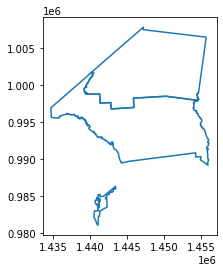

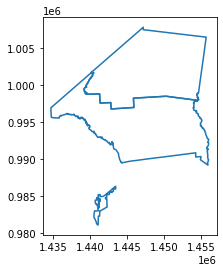

In [77]:
gp.GeoDataFrame(overlap.iloc[6380:6383], crs = tx_vest.crs)['geometry_y'].boundary.plot()
gp.GeoDataFrame(overlap.iloc[6380:6383], crs = tx_vest.crs)['geometry_x'].boundary.plot()

C:\Users\youhy\AppData\Local\Temp/ipykernel_4904/1029348256.py:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gp.GeoDataFrame(overlap.iloc[6377:6379], crs = tx_vest.crs)['geometry_y'].boundary.plot()
C:\Users\youhy\AppData\Local\Temp/ipykernel_4904/1029348256.py:2: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gp.GeoDataFrame(overlap.iloc[6377:6379], crs = tx_vest.crs)['geometry_x'].boundary.plot()


<AxesSubplot:>

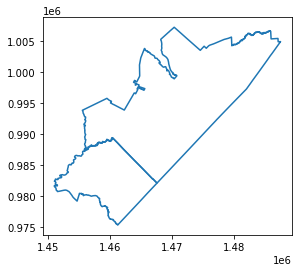

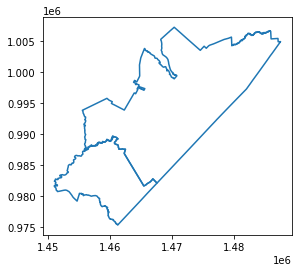

In [78]:
gp.GeoDataFrame(overlap.iloc[6377:6379], crs = tx_vest.crs)['geometry_y'].boundary.plot()
gp.GeoDataFrame(overlap.iloc[6377:6379], crs = tx_vest.crs)['geometry_x'].boundary.plot()

Ok, so these look like substantive differences in the shapefiles